In [5]:
%matplotlib nbagg
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

<IPython.core.display.Javascript object>


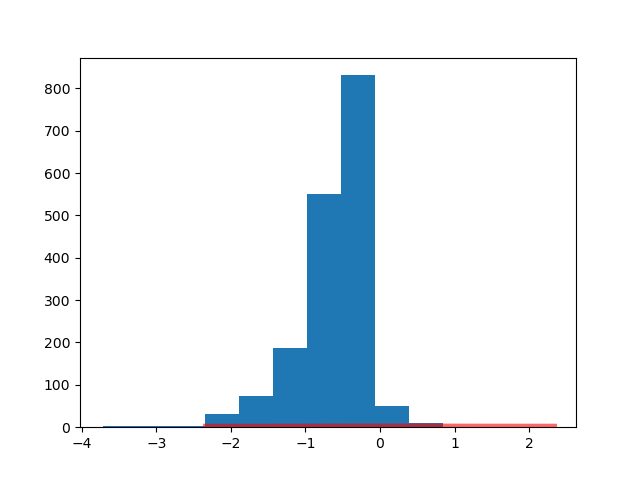

In [7]:
fig, ax = plt.subplots()
x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)

ax.plot(x, norm.pdf(x),
       'r-', lw=5, alpha=0.6)

ax.plot(x, np.full(len(x), 0.2),
      # 'b-', lw=1)

fig.show()

In [33]:
import pandas
df = pandas.read_csv("./data/TCL_wt1.tsv", sep = '\t')

df.head()

df.shape

df.tail()

df.columns

df.describe()

df.dtypes

print(df.shape)
df = df.dropna()
print(df.shape)
df.dtypes
#Typage
df = df.astype({
    'Log2 Corrected Abundance Ratio': float, '-LOG10 Adj.P-val' : float
})
df.head()
df.describe()



(2024, 7)
(1746, 7)


,Log2 Corrected Abundance Ratio,Abundance Ratio Adj. P-Value: (127. T3 Tc WT) / (126. T0 WT),-LOG10 Adj.P-val
count,1746.000000,1.746000e+03,1746.000000
mean,-0.638626,8.234275e-01,0.384861
std,0.470759,3.509350e-01,1.067665
min,-3.721335,1.034030e-08,0.000000
25%,-0.824011,1.000000e+00,0.000000
50%,-0.511882,1.000000e+00,0.000000
75%,-0.354410,1.000000e+00,0.000000
max,0.846424,1.000000e+00,7.985468


In [36]:
values = df[['Description', 'Gene Symbol']]
values

,Description,Gene Symbol
0,Basal-body rod modification protein FlgD OS=Es...,flgD
1,Uncharacterized protein YeaC OS=Escherichia co...,yeaC
2,Flagellar transcriptional regulator FlhD OS=Es...,flhD
4,PTS system glucitol/sorbitol-specific EIIA com...,srlB
5,Flagellar hook-associated protein 3 OS=Escheri...,flgL
...,...,...
2011,Prophage lipoprotein Bor homolog OS=Escherichi...,borD
2016,Outer membrane protein TolC OS=Escherichia col...,tolC
2020,Outer membrane protein X OS=Escherichia coli (...,ompX
2021,Outer membrane protein F OS=Escherichia coli (...,ompF


In [42]:
#accès  premier ligne de toute les colonnes
df.iloc[ :5, [0,2,3]]

,Accession,Gene Symbol,Corrected Abundance ratio (1.53)
0,P75936,flgD,0.075816993
1,P76231,yeaC,0.092810458
2,P0A8S9,flhD,0.102614379
4,P05706,srlB,0.108496732
5,P29744,flgL,0.124183007


In [45]:
#df.loc[(df['-LOG10 Adj.P-val'] > 0 )  & (df['Log2 Corrected Abundance Ratio'] > 0.0 ) ]['-LOG10 Adj.P-val'].tolist()

df['-LOG10 Adj.P-val'].tolist()

[4.260067469,
 3.45462743,
 4.571899347,
 1.699767669,
 1.434786589,
 2.887197633,
 6.154103778,
 2.878506676,
 0.328873724,
 0.277155457,
 6.154103778,
 4.114204046,
 1.194484636,
 4.072372404,
 0.0,
 5.851209497,
 1.571788011,
 0.217112546,
 1.566582123,
 0.0,
 1.24151868,
 5.447748877,
 2.5687698,
 3.906960599,
 0.85813682,
 6.102280415,
 6.364546423,
 0.854806917,
 3.111093695,
 0.0,
 5.776425379,
 1.445577189,
 0.0,
 5.711466922,
 3.390799411,
 0.0,
 4.228029499,
 0.0,
 2.040169931,
 5.188377005,
 0.0,
 0.388479526,
 0.0,
 0.0,
 0.0,
 4.335421286,
 0.835217172,
 1.223170126,
 0.0,
 0.631925914,
 0.351002168,
 0.285355766,
 0.878174959,
 0.0,
 0.0,
 2.123516608,
 0.987807505,
 0.227862336,
 4.200085927,
 0.456344511,
 2.870630094,
 5.519981065,
 1.037463627,
 0.0,
 5.244382062,
 0.0,
 3.634145379,
 4.202291918,
 7.985467646,
 7.600817256,
 2.474635275,
 2.021025457,
 5.302824233,
 2.845414996,
 2.590971936,
 5.302824233,
 0.098545174,
 6.243825989,
 1.021678366,
 0.0,
 0.471735181,

<IPython.core.display.Javascript object>


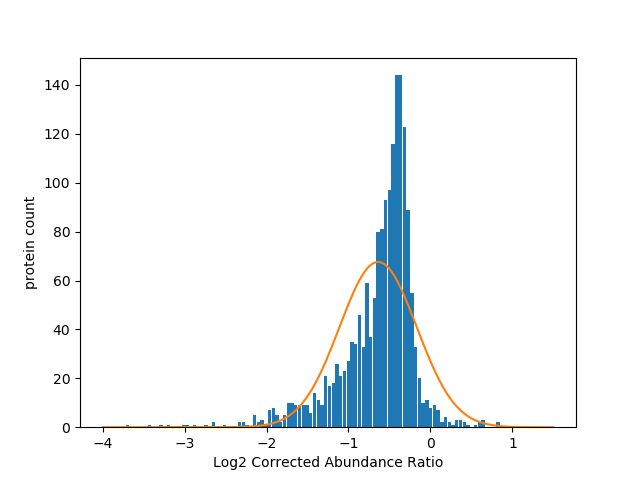

-0.63862621564433 0.4704898017787741


In [67]:
from math import sqrt
fig, ax = plt.subplots()
field = 'Log2 Corrected Abundance Ratio'
hist =ax.hist(df[field].tolist(), bins= 100, rwidth = 0.9)
ax.set_xlabel(field)
ax.set_ylabel('protein count')

_ = df[field].tolist()
n = len(_)
mu = np.mean(_)
S2 = np.std(_) * np.std(_)
sigma= sqrt((n/(n+1)) * S2)
print(mu,sigma)

x = np.linspace(-4, 1.5, 150)
dx = hist[1][1] - hist[1][0] 
bar_scale = dx * n 
ax.plot( x, norm.pdf(x, loc=mu, scale=sigma)*bar_scale)
